In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [40]:
import numpy as np
import pandas as pd
import datetime as dt

In [41]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, text, Integer, String

In [42]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [43]:
inspector = inspect(engine)

inspector.get_table_names()

['measurement', 'station']

In [44]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [45]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)
Base.classes.keys()

['measurement', 'station']

In [46]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [47]:
# Create our session (link) from Python to the DB

session = Session(bind=engine)

In [48]:
# Find the most recent date in the data set.

most_recent_date = session.query(func.max(measurement.date)).scalar()

most_recent_date

'2017-08-23'

In [49]:
previouse_year = dt.date(2017, 8, 23)- dt.timedelta(days=365)
results = session.query(measurement.date, measurement.prcp).filter
previouse_year

datetime.date(2016, 8, 23)

<Axes: xlabel='date'>

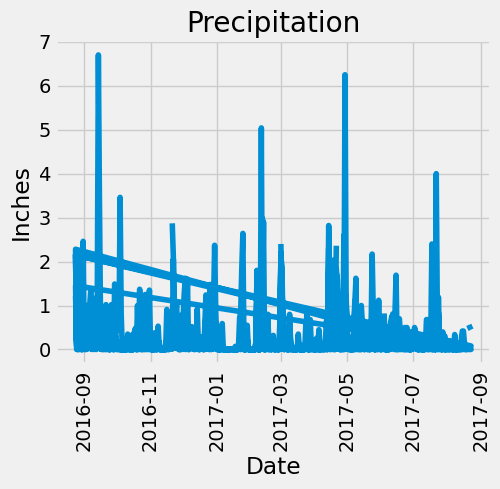

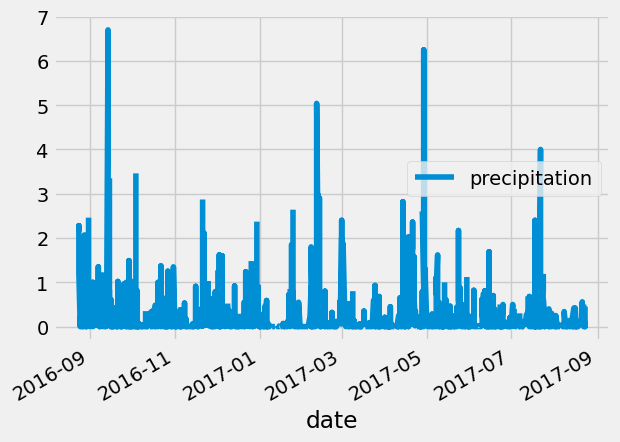

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = engine.execute("SELECT MAX(date) FROM measurement").fetchone()[0]
one_year_ago = pd.to_datetime(query_date) - pd.DateOffset(years=1)

# Perform a query to retrieve the data and measurement scores
query = f"SELECT date, prcp AS precipitation FROM measurement WHERE date >= '{one_year_ago}'"
df = pd.read_sql(query, engine)

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the dataframe by date
df.set_index('date', inplace=True)


# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(5, 4))
plt.plot (df['precipitation'])
plt.xlabel('Date')
plt.ylabel('Inches')



plt.title('Precipitation')
plt.xticks(rotation=90)


#plt.show()
df.plot()

In [55]:
df

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [56]:
print(one_year_ago)
print(query_date)
print(df)

2016-08-23 00:00:00
2017-08-23
            precipitation
date                     
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
...                   ...
2017-08-19           0.09
2017-08-20            NaN
2017-08-21           0.56
2017-08-22           0.50
2017-08-23           0.45

[2223 rows x 1 columns]


In [57]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['precipitation'].describe()

print(summary_stats)


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


In [58]:
# Design a query to calculate the total number of stations in the dataset
query = "SELECT COUNT(DISTINCT station) AS total_stations FROM station"

result = engine.execute(query).fetchone()

# Get total number of stations from the result
total_stations = result[0]

print(total_stations)

9


In [59]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = text("""
SELECT station, count(*) AS row_count
FROM measurement
GROUP BY station
ORDER BY row_count DESC
""")

results = engine.execute(query).fetchall()

for row in results:
    station = row[0]
    row_count = row[1]
    print(f"('{station}', {row_count}),")            

('USC00519281', 2772),
('USC00519397', 2724),
('USC00513117', 2709),
('USC00519523', 2669),
('USC00516128', 2612),
('USC00514830', 2202),
('USC00511918', 1979),
('USC00517948', 1372),
('USC00518838', 511),


In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'

# Calculated the lowest, highest, and average temperature.
query = text("""
SELECT MIN(tobs) AS lowest_temp, MAX(tobs) AS highest_temp, AVG(tobs) AS average_temp
FROM measurement
WHERE station = :station
""")

result = engine.execute(query, station=most_active_station).fetchone()

lowest_temp = result['lowest_temp']
highest_temp = result['highest_temp']
average_temp = result['average_temp']

print(f"({lowest_temp}, {highest_temp}, {average_temp}")

(54.0, 85.0, 71.66378066378067


In [61]:
print(df.dtypes)

precipitation    float64
dtype: object


<Figure size 500x400 with 0 Axes>

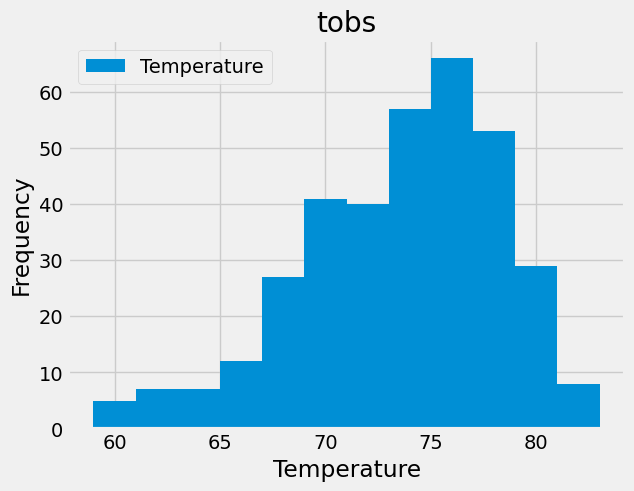

In [75]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_date = pd.to_datetime('2017-08-23').date() - pd.DateOffset(years=1)

# Covert the query_date to a datetime.date object
query_date = query_date.date()

query = ("""
SELECT tobs
FROM measurement
WHERE station = :station
    AND date >= :query_date
""")

params = {'station': most_active_station, 'query_date': query_date}

results = engine.execute(query, params).fetchall()

# Extract the temperature observations from the result
temperatures = [row['tobs'] for row in results]


# Convert the temperature observations to a Pandas DataFrame
df = pd.DataFrame(temperatures, columns=['Temperature'])

# Convert the 'tobs' column to integer type
df['Temperature'] = df['Temperature'].astype(int)

# Plot the histogram
plt.figure(figsize=(5,4))
df.plot.hist (bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('tobs')
plt.grid(True)
plt.show()



In [ ]:
# Close Session
session.close()